In [133]:
%matplotlib inline
import math
import numpy as np
from numpy import exp, pi
import pickle
import matplotlib.pyplot as plt

In [197]:
from scipy.integrate import simps
from scipy.special import cbrt
from scipy.stats import linregress

import pyoz as oz

In [205]:
def potential(r, e, m):
    SR = oz.wca(r=r, eps=e, sig=1, m=m, n=m/2)
    total = oz.mie(r=r, eps=e, sig=1, m=m, n=m/2)
    return SR, total

def sig_eff(r, U_rep):
    return simps(y=1 - exp(-U_rep), x=r)

def B2_star(r, U_rep, U):
    s = sig_eff(r, U_rep)
    B2 = calc_B2(r, U)
    return B2 / (2/3 * np.pi * s**3)

def calc_B2(r, U):
    return 2 * pi * simps(y=(1 - exp(-U)) * r**2, x=r)

def calc_R(B2_star, eps):
#     l = cbrt((B2_star - 1) / (1 - exp(eps)) + 1)
    l = ((B2_star - 1) / (1 - exp(eps)) + 1)**(1/3)
    return l - 1

In [206]:
dr = 0.001
r = np.arange(dr, 100+dr, dr)

In [207]:
epsilons = np.arange(0.5, 5, 0.5)
ms = range(12, 97, 12)
data = list()
for m in ms:
    m_data = []
    for eps in epsilons:
        SR, total = potential(r, e=eps, m=m)
        B2s = B2_star(r, U_rep=SR, U=total)
        B2 = calc_B2(r, U=total)
        R = calc_R(B2s, eps)
        m_data.append(R)
    data.append(m_data)

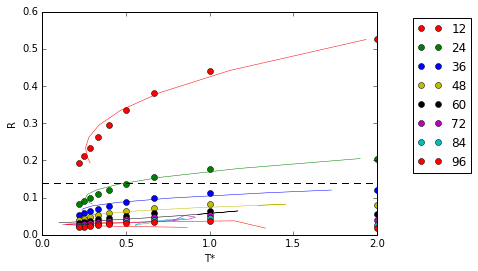

In [208]:
T_thresh = dict()
colors = ['r', 'g', 'b', 'y', 'k', 'm', 'c', 'r']
markers = ['o', 'v', '^', '>', '8', 'D', 'H', 'x']
for color, Rs, m in zip(colors, data, ms):     
#     r, b2 = Rs
#     plt.plot(epsilons, b2)
    p = np.polyfit(Rs, 1/epsilons, 2)
    
    plt.plot(1/epsilons, Rs, color=color, marker='o', lw=0, label=m)
    plt.plot(np.polyval(p, Rs), Rs, color=color, lw=0.5)

    threshold = 0.14
    T_thresh[m] = np.polyval(p, threshold)
    plt.axhline(y=threshold, color='k', ls='--')

plt.xlabel('T*')
plt.ylabel('R')
# plt.yscale('log')
handles, labels = plt.gca().get_legend_handles_labels()
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.3, 1.0))     

In [194]:
T_thresh

{12: 0.28307013795251401,
 24: 0.65369266377065005,
 36: 1.4419430047947797,
 48: 2.6297064372205217,
 60: 4.2176320995545931,
 72: 6.2146001952083836,
 84: 8.6331976018761321,
 96: 11.488016684364478}

(0, 3)

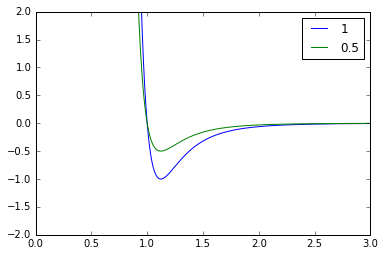

In [191]:
m=12
SR, SA = potential(r, 1, m)
plt.plot(r, SR + SA, label=1)
m=12
SR, SA = potential(r, 0.5, m)
plt.plot(r, SR + SA, label=0.5)
plt.legend()
plt.ylim(-2, 2)
plt.xlim(0, 3)